<a href="https://colab.research.google.com/github/DhruvaShetty10/king/blob/main/CC_Approvals_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import os
import zipfile
import pandas as pd

zip_file_path = '/content/cc_approvals.zip'
if not os.path.exists(zip_file_path):
    raise FileNotFoundError(f"Zip file not found at {zip_file_path}")


extracted_folder = '/content/extracted_files'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

print("Extracted files:", os.listdir(extracted_folder))


csv_file_path = '/content/extracted_files/crx.data'
if not os.path.exists(csv_file_path):
    raise FileNotFoundError(f"CSV file not found at {csv_file_path}")

cc_apps = pd.read_csv(csv_file_path, header=None)


print(cc_apps.head())

Extracted files: ['credit.lisp', 'Index', 'crx.data', 'crx.names', 'credit.names']
  0      1      2  3  4  5  6     7  8  9   10 11 12     13   14 15
0  b  30.83  0.000  u  g  w  v  1.25  t  t   1  f  g  00202    0  +
1  a  58.67  4.460  u  g  q  h  3.04  t  t   6  f  g  00043  560  +
2  a  24.50  0.500  u  g  q  h  1.50  t  f   0  f  g  00280  824  +
3  b  27.83  1.540  u  g  w  v  3.75  t  t   5  t  g  00100    3  +
4  b  20.17  5.625  u  g  w  v  1.71  t  f   0  f  s  00120    0  +


In [27]:
cc_apps[15].value_counts()

,count
15,
-,383
+,307


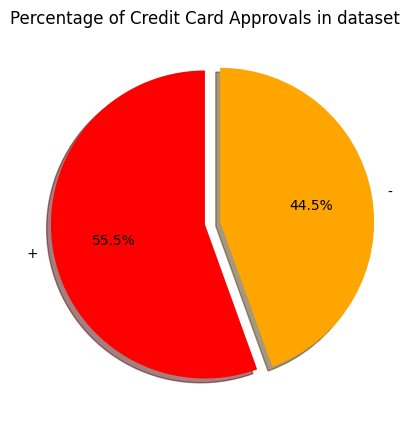

In [28]:

data_size = cc_apps[15].value_counts(sort=True)
colors = ['red','orange']
rcParams['figure.figsize'] = 5,5


labels = '+', '-'
explode = (0, 0.1)
plt.pie(data_size, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of Credit Card Approvals in dataset')
plt.show()

In [29]:

cc_apps_description = cc_apps.describe()
print(cc_apps_description)

print("\n")


cc_apps_info = cc_apps.info()
print(cc_apps_info)

print("\n")


cc_apps.tail(17)

               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 no

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


In [30]:

print('Before', cc_apps.tail(17))

cc_apps = cc_apps.replace('?', np.nan)


print('After', cc_apps.tail(17))

Before     0      1       2  3  4   5   6      7  8  9   10 11 12     13   14 15
673  ?  29.50   2.000  y  p   e   h  2.000  f  f   0  f  g  00256   17  -
674  a  37.33   2.500  u  g   i   h  0.210  f  f   0  f  g  00260  246  -
675  a  41.58   1.040  u  g  aa   v  0.665  f  f   0  f  g  00240  237  -
676  a  30.58  10.665  u  g   q   h  0.085  f  t  12  t  g  00129    3  -
677  b  19.42   7.250  u  g   m   v  0.040  f  t   1  f  g  00100    1  -
678  a  17.92  10.210  u  g  ff  ff  0.000  f  f   0  f  g  00000   50  -
679  a  20.08   1.250  u  g   c   v  0.000  f  f   0  f  g  00000    0  -
680  b  19.50   0.290  u  g   k   v  0.290  f  f   0  f  g  00280  364  -
681  b  27.83   1.000  y  p   d   h  3.000  f  f   0  f  g  00176  537  -
682  b  17.08   3.290  u  g   i   v  0.335  f  f   0  t  g  00140    2  -
683  b  36.42   0.750  y  p   d   v  0.585  f  f   0  f  g  00240    3  -
684  b  40.58   3.290  u  g   m   v  3.500  f  f   0  t  s  00400    0  -
685  b  21.08  10.085  y  p   e

In [31]:

cc_apps[0].value_counts()

,count
0,
b,468
a,210


In [32]:
cc_apps.isnull().sum()

,0
0,12
1,12
2,0
3,6
4,6
5,9
6,9
7,0
8,0
9,0


In [33]:

for col in cc_apps:

    if cc_apps[col].dtypes == 'object':

        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])


cc_apps.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [34]:
cc_apps = cc_apps.apply(LabelEncoder().fit_transform)
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,156,0,2,1,13,8,30,1,1,1,0,0,68,0,0
1,0,328,93,2,1,11,4,65,1,1,6,0,0,11,119,0
2,0,89,16,2,1,11,4,36,1,0,0,0,0,96,140,0
3,1,125,46,2,1,13,8,73,1,1,5,1,0,31,3,0
4,1,43,109,2,1,13,8,41,1,0,0,0,2,37,0,0


<Axes: >

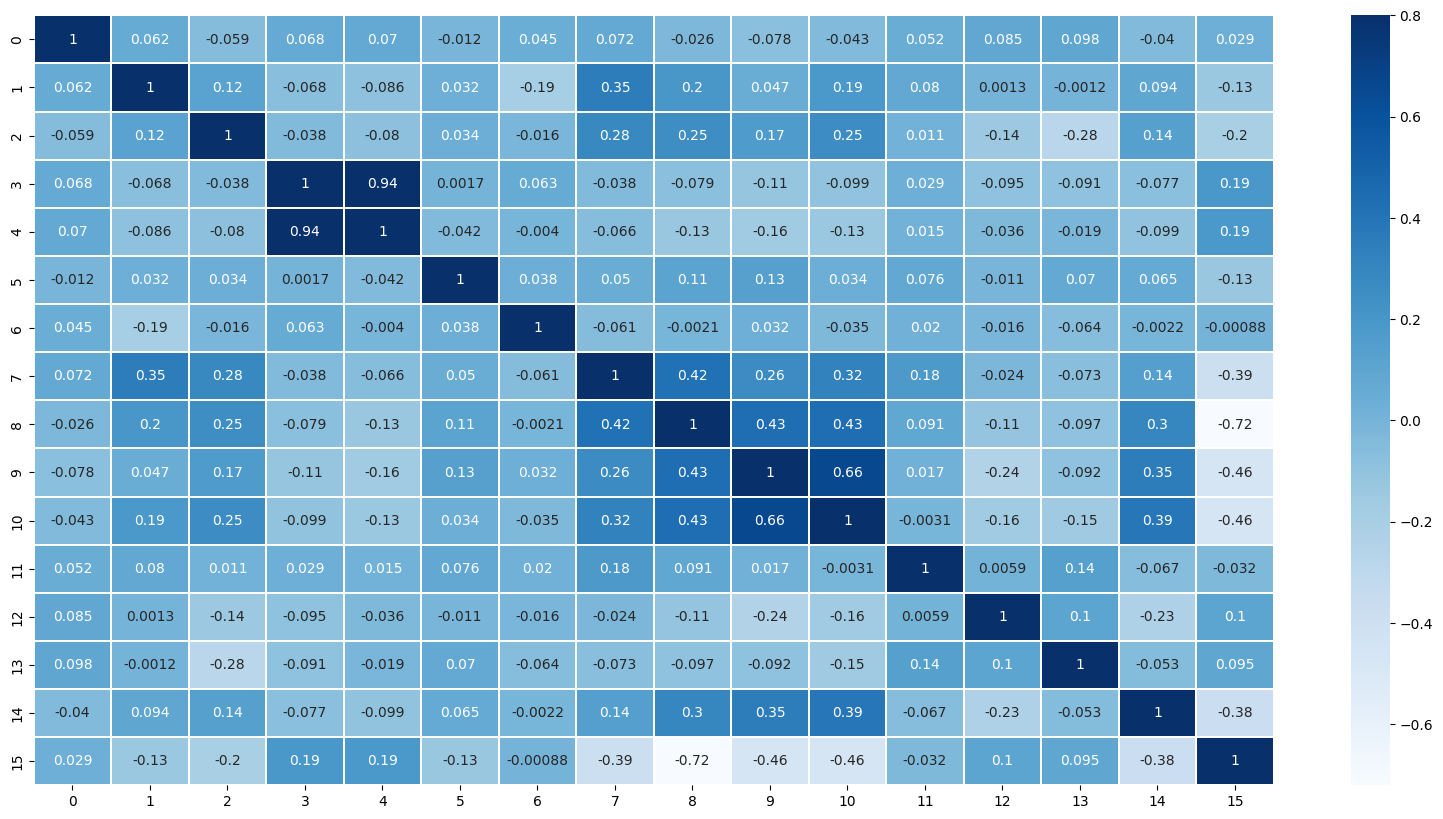

In [35]:

corr_matrix = cc_apps.corr()
f, ax = plt.subplots(figsize=(20, 10))


sns.heatmap(corr_matrix, linewidths=0.1, cmap = plt.cm.Blues, linecolor = 'White', vmax=0.8, annot=True)

In [36]:
cc_apps.corr()[15]

,15
0,0.028934
1,-0.133304
2,-0.202400
3,0.191431
4,0.187520
5,-0.130026
6,-0.000877
7,-0.385006
8,-0.720407
9,-0.458301


In [37]:

cc_apps.corr()[15].abs() > 0.15

,15
0,False
1,False
2,True
3,True
4,True
5,False
6,False
7,True
8,True
9,True


In [38]:
feature_names = [2,3,4, 7,8,9,10,14]

In [39]:

X = cc_apps[feature_names]
y = cc_apps[[15]]

X_train, X_test, y_train, y_test = train_test_split(X,
                                y, stratify = y, test_size=0.33, random_state=42)

In [40]:

y_train

,15
41,0
675,1
31,0
624,1
303,1
...,...
101,1
416,1
569,0
290,1


In [41]:

np.count_nonzero(y_train == 1)

256

In [42]:
np.count_nonzero(y_train == 0)

206

In [43]:

np.count_nonzero(y_test==1)

127

In [44]:

np.count_nonzero(y_test==0)

101

In [45]:

from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

In [46]:

rescaledX_train

array([[0.92417062, 0.66666667, 0.33333333, ..., 1.        , 0.5       ,
        0.79497908],
       [0.1563981 , 0.66666667, 0.33333333, ..., 0.        , 0.        ,
        0.34728033],
       [0.7014218 , 0.66666667, 0.33333333, ..., 1.        , 0.36363636,
        0.        ],
       ...,
       [0.14218009, 0.66666667, 0.33333333, ..., 1.        , 0.18181818,
        0.72803347],
       [0.11848341, 0.66666667, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.34123223, 0.66666667, 0.33333333, ..., 1.        , 0.04545455,
        0.09205021]])

In [47]:

rescaledX_test

array([[0.55140187, 0.66666667, 0.33333333, ..., 0.        , 0.        ,
        0.21212121],
       [0.02336449, 0.66666667, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.09813084, 0.66666667, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.91121495, 0.66666667, 0.33333333, ..., 1.        , 0.66666667,
        0.80952381],
       [0.40186916, 0.66666667, 0.33333333, ..., 1.        , 0.14285714,
        0.81818182],
       [0.03738318, 0.66666667, 0.33333333, ..., 1.        , 0.52380952,
        0.20779221]])

In [48]:
rescaledX_train = pd.DataFrame(rescaledX_train, columns = feature_names)
rescaledX_test = pd.DataFrame(rescaledX_test, columns = feature_names)

In [49]:

rescaledX_train

,2,3,4,7,8,9,10,14
0,0.924171,0.666667,0.333333,0.692308,1.0,1.0,0.500000,0.794979
1,0.156398,0.666667,0.333333,0.130769,0.0,0.0,0.000000,0.347280
2,0.701422,0.666667,0.333333,0.815385,1.0,1.0,0.363636,0.000000
3,0.123223,1.000000,1.000000,0.130769,0.0,0.0,0.000000,0.000000
4,0.336493,0.666667,0.333333,0.015385,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
457,0.943128,1.000000,1.000000,0.576923,1.0,0.0,0.000000,0.000000
458,0.018957,1.000000,1.000000,0.023077,0.0,0.0,0.000000,0.179916
459,0.142180,0.666667,0.333333,0.146154,1.0,1.0,0.181818,0.728033
460,0.118483,0.666667,0.333333,0.100000,0.0,0.0,0.000000,0.000000


In [50]:


logreg = LogisticRegression()


logreg.fit(rescaledX_train,y_train.values.ravel())

LogisticRegression()

In [51]:


y_pred = logreg.predict(rescaledX_test)


print("Accuracy of logistic regression classifier: ", accuracy_score(y_test,y_pred))


print('Confusion matrix: ', confusion_matrix(y_test,y_pred))

Accuracy of logistic regression classifier:  0.8464912280701754
Confusion matrix:  [[ 88  13]
 [ 22 105]]


In [52]:

tol = [0.01,0.001, 0.0001]
max_iter = [100,150,200]

param_grid = dict(tol=tol, max_iter=max_iter)

In [53]:
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

rescaledX = scaler.fit_transform(X)


grid_model_result = grid_model.fit(rescaledX, y.values.ravel())

best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.853623 using {'max_iter': 100, 'tol': 0.01}
